## S-Mobile: Predicting Customer Churn

* Team-lead GitHub userid: rsm-zew028
* Group name: Group_6
* Team member names:
    - Zechen Wang
    - Ti Yang
    - Runjie Xiao
    - Xueying Yu

In [1]:
import pandas as pd
import pyrsm as rsm
import numpy as np
rsm.__version__ # should be 0.9.21 or newer

'0.9.22'

In [2]:
### pip install --user "pyrsm>=0.9.22"


In [3]:
## load the data - this dataset must NOT be changed
s_mobile = pd.read_parquet("data/s_mobile.parquet")

In [4]:
rsm.md("data/s_mobile_description.md")

## S-mobile

Dataset used to investigate opportunities to decrease customer churn at S-mobile. The sample consists of three parts:

1. A training sample with 27,300 observations and a 50% churn rate ("training == 1")
2. A test sample with 11,700 observations and a 50% churn rate ("training == 0")
3. A representative sample with 30,000 observations and a churn rate of 2%, i.e., the actual monthly churn rate for S-mobile ("is.na(training)" or "representative == 1")

## Variables

* customer: Customer ID
* churn: Did consumer churn in the last 30 days? (yes or no)
* changer: % change in revenue over the most recent 4 month period
* changem: % change in minutes of use over the most recent 4 month period
* revenue: Mean monthly revenue in SGD
* mou: Mean monthly minutes of use
* overage: Mean monthly overage minutes
* roam: Mean number of roaming calls
* conference: Mean number of conference calls
* months: # of months the customer has had service with S-Mobile
* uniqsubs: Number of individuals listed on the customer account
* custcare: Mean number of calls to customer care 
* retcalls: Number of calls by the customer to the retention team
* dropvce: Mean number of dropped voice calls 
* eqpdays: Number of days customer has owned current handset
* refurb: Handset is refurbished (no or yes)
* smartphone: Handset is a smartphone (no or yes)
* creditr: High credit rating as opposed to medium or low (no or yes)
* mcycle: Subscriber owns a motorcycle (no or yes)
* car: Subscriber owns a car (no or yes)
* travel: Subscriber has traveled internationally (no or yes)
* region: Regions delineated by the 5 Community Development Council Districts (e.g., CS is Central Singapore)
* occupation: Categorical variable with 4 occupation levels (professional, student, retired, or other)
* training: 1 for training sample, 0 for test sample, NA for representative sample
* representative: 1 for representative sample, 0 for training and test sample


If you want access to the full 1M row dataset, use the code below to download and use the data. Please do **not** include the 1M row dataset in your repo!

The downside to using the dataset with 1M rows is, of course, that estimation time will increase substantially. I do NOT recommend you use this dataset to select your final model or for tuning hyper parameters. You can, however, use this larger dataset to re-estimate your chosen model and generate profit estimates for the representative sample.

In [5]:
s_mobile_1M = pd.read_parquet("https://www.dropbox.com/scl/fi/upm68ytk5r7oz2xd61qau/s_mobile_1M.parquet?rlkey=0pap46l024yryr4h08mvexiha&dl=1")
s_mobile_1M

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U88927415,no,-1,-8,31,118,1,0,0,38,...,no,yes,no,no,no,no,SW,other,0.0,0
1,U94655060,no,0,-2,87,412,104,0,0,10,...,no,yes,no,no,no,yes,CS,student,1.0,0
2,U22910834,no,1,23,138,1252,0,3,0,19,...,no,yes,no,no,no,no,SE,student,1.0,0
3,U55939985,no,-1,-15,58,69,42,3,0,8,...,no,yes,yes,no,no,no,NE,other,NaN,1
4,U74897690,no,-9,-20,117,1002,175,4,0,11,...,yes,yes,no,no,no,no,SE,other,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004995,U63357590,no,2,34,54,778,115,1,1,7,...,no,yes,no,no,no,no,NW,other,0.0,0
1004996,U10548621,no,-5,-20,31,176,40,3,0,35,...,no,no,no,no,no,no,CS,retired,1.0,0
1004997,U61718563,no,-3,-2,45,1731,105,0,0,30,...,no,yes,no,no,no,no,SW,other,1.0,0
1004998,U79998923,no,73,46,108,1156,144,18,0,18,...,no,yes,no,no,no,no,CS,other,0.0,0


In [6]:
# run python code from another notebook
rsm.md_notebook("./sub-notebooks/model1.ipynb")
%run ./sub-notebooks/model1.ipynb


```python
lr = rsm.model.logistic(
    data=s_mobile.query("training == 1"),
    rvar="churn",
    lev="yes",
    evar="changer",
)
print(lr.summary())
```


Logistic regression (GLM)
Data                 : Not provided
Response variable    : churn
Level                : yes
Explanatory variables: changer
Null hyp.: There is no effect of x on churn
Alt. hyp.: There is an effect of x on churn

              OR    OR%  coefficient  std.error  z.value p.value    
Intercept  0.990  -1.0%        -0.01      0.013   -0.786   0.432    
changer    1.001   0.1%         0.00      0.000    2.737   0.006  **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pseudo R-squared (McFadden): 0.0
Pseudo R-squared (McFadden adjusted): 0.0
Area under the RO Curve (AUC): 0.509
Log-likelihood: -18919.161, AIC: 37842.322, BIC: 37858.752
Chi-squared: 7.514, df(1), p.value 0.006 
Nr obs: 27,300
None


In [7]:
# importing functions from a module/package
from utils import functions

functions.example()


You just accessed a function from your first python packages!
Change the code in utils/function.py to whatever you need for this assignment
Use 'from utils import functions' to get access to your code
You can add modules to import from by adding additional .py files to the 'utils' directory
Note: If you make changes to the content of this file you will have to restart the notebook kernel to get the updates



## Question answers

In [8]:
s_mobile

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,54,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,no,yes,NW,professional,NaN,1
3,U75794640,no,0,-8,35,560,0,0,0,37,...,no,yes,yes,yes,no,no,NW,retired,1.0,0
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,no,yes,yes,no,SW,other,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,U97081813,no,0,-15,33,49,0,0,0,19,...,no,yes,no,yes,yes,no,SW,other,NaN,1
68996,U24071089,no,0,95,30,78,0,0,0,18,...,no,no,no,yes,yes,no,SE,other,1.0,0
68997,U52895026,yes,0,5,43,250,53,0,0,25,...,no,no,no,no,no,no,CS,student,0.0,0
68998,U69840472,yes,-3,-29,41,288,0,0,0,19,...,no,yes,no,no,no,no,CS,other,1.0,0


In [9]:
pd.get_dummies(
    s_mobile.loc[s_mobile.training == 1, "churn":],
    drop_first=True,
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.661245,28.956823,-62.0,305.0
changem,15.211392,51.885577,-78.0,521.0
revenue,57.211136,43.25895,0.0,856.0
mou,515.322308,525.458925,0.0,7668.0
overage,66.274286,69.258068,0.0,283.0
roam,1.197253,7.254327,0.0,692.0
conference,0.26348,1.083898,0.0,56.0
months,18.781502,9.595614,6.0,61.0
uniqsubs,1.546227,0.891051,1.0,18.0
custcare,2.288132,4.19297,0.0,32.0


In [10]:
pd.get_dummies(
    s_mobile.loc[s_mobile.representative == 1, "churn":],
    drop_first=True,
).agg(["mean", "std", "min", "max"]).T

,mean,std,min,max
changer,8.310567,28.49632,-90.0,437.0
changem,17.254533,51.37539,-78.0,540.0
revenue,56.6348,43.339533,0.0,1223.0
mou,540.767067,536.368824,0.0,7359.0
overage,61.7234,67.846131,0.0,265.0
roam,1.187867,10.058579,0.0,1112.0
conference,0.2964,1.284316,0.0,66.0
months,18.592767,9.928488,6.0,61.0
uniqsubs,1.501367,0.840013,1.0,12.0
custcare,2.514533,4.357846,0.0,32.0


In [11]:
s_mobile["churn_yes"] = rsm.ifelse(s_mobile["churn"] == "yes", 1, 0)

In [12]:
class_weight_dict = {0: 29, 1: 1}
s_mobile["cweight"] = rsm.ifelse(
    s_mobile.churn == "yes", class_weight_dict[1], class_weight_dict[0]
)

### 1.    Develop a model to predict customer churn
- Feel free to use any technique you like to predict churn. However, one of your models must be a logistic regression
- Build models using the training data and explain your modeling choices

In [13]:
s_mobile.columns

Index(['customer', 'churn', 'changer', 'changem', 'revenue', 'mou', 'overage',
       'roam', 'conference', 'months', 'uniqsubs', 'custcare', 'retcalls',
       'dropvce', 'eqpdays', 'refurb', 'smartphone', 'highcreditr', 'mcycle',
       'car', 'travel', 'region', 'occupation', 'training', 'representative',
       'churn_yes', 'cweight'],
      dtype='object')

In [14]:
evar = s_mobile.columns.tolist()
evar = evar[evar.index('churn')+1: evar.index("training")]

In [15]:
lr = rsm.model.logistic(
    data={"s_mobile": s_mobile[s_mobile.training == 1]},
    rvar="churn",
    lev="yes",
    evar=evar,
)
lr.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.085
Pseudo R-squared (McFadden adjusted): 0.084
Area under the RO Curve (AUC): 0.689
Log-likelihood: -17311.321, AIC: 34676.643, BIC: 34898.438
Chi-squared: 3223.193, df(26), p.value < 0.001 
Nr obs: 27,300


In [16]:
lrw = rsm.model.logistic(
    data={"s_mobile": s_mobile[s_mobile.training == 1]},
    rvar="churn",
    lev="yes",
    evar=evar,
    weights="cweight",
)
lrw.summary(main=False, fit=True)


Pseudo R-squared (McFadden): 0.051
Pseudo R-squared (McFadden adjusted): 0.051
Area under the RO Curve (AUC): 0.688
Log-likelihood: -56775.162, AIC: 113604.323, BIC: 113899.236
Chi-squared: 6142.224, df(26), p.value < 0.001 
Nr obs: 409,500


### 2.    Use your model to describe the main drivers of churn and report on the key factors that predict customer churn and their relative importance.
- Briefly discuss 5 key drivers of churn from your analysis in this step using Variable  Importance (Permutation Importance) and Prediction or Partial Dependence plots

In [17]:
lrw.coef[1:].round(3)

,index,OR,OR%,coefficient,std.error,z.value,p.value,
1,refurb[T.yes],1.319,31.946,0.277,0.025,10.934,0.000,***
2,smartphone[T.yes],0.913,-8.744,-0.092,0.030,-3.022,0.003,**
3,highcreditr[T.yes],0.484,-51.617,-0.726,0.031,-23.530,0.000,***
4,mcycle[T.yes],0.883,-11.733,-0.125,0.029,-4.283,0.000,***
5,car[T.yes],0.991,-0.870,-0.009,0.039,-0.225,0.822,
6,travel[T.yes],0.781,-21.940,-0.248,0.040,-6.236,0.000,***
7,region[T.NE],0.644,-35.595,-0.440,0.027,-16.456,0.000,***
8,region[T.NW],0.660,-34.016,-0.416,0.026,-15.698,0.000,***
9,region[T.SE],0.651,-34.931,-0.430,0.026,-16.238,0.000,***
10,region[T.SW],0.627,-37.286,-0.467,0.027,-17.471,0.000,***


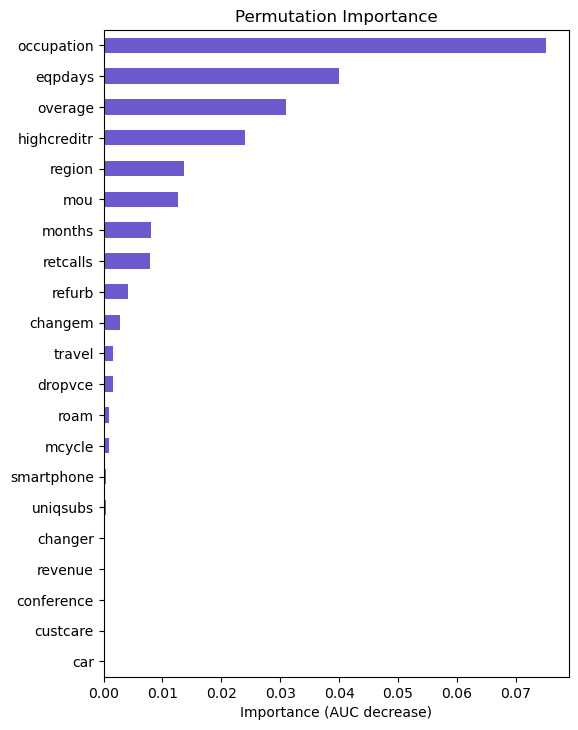

In [18]:
lrw.plot("vimp")

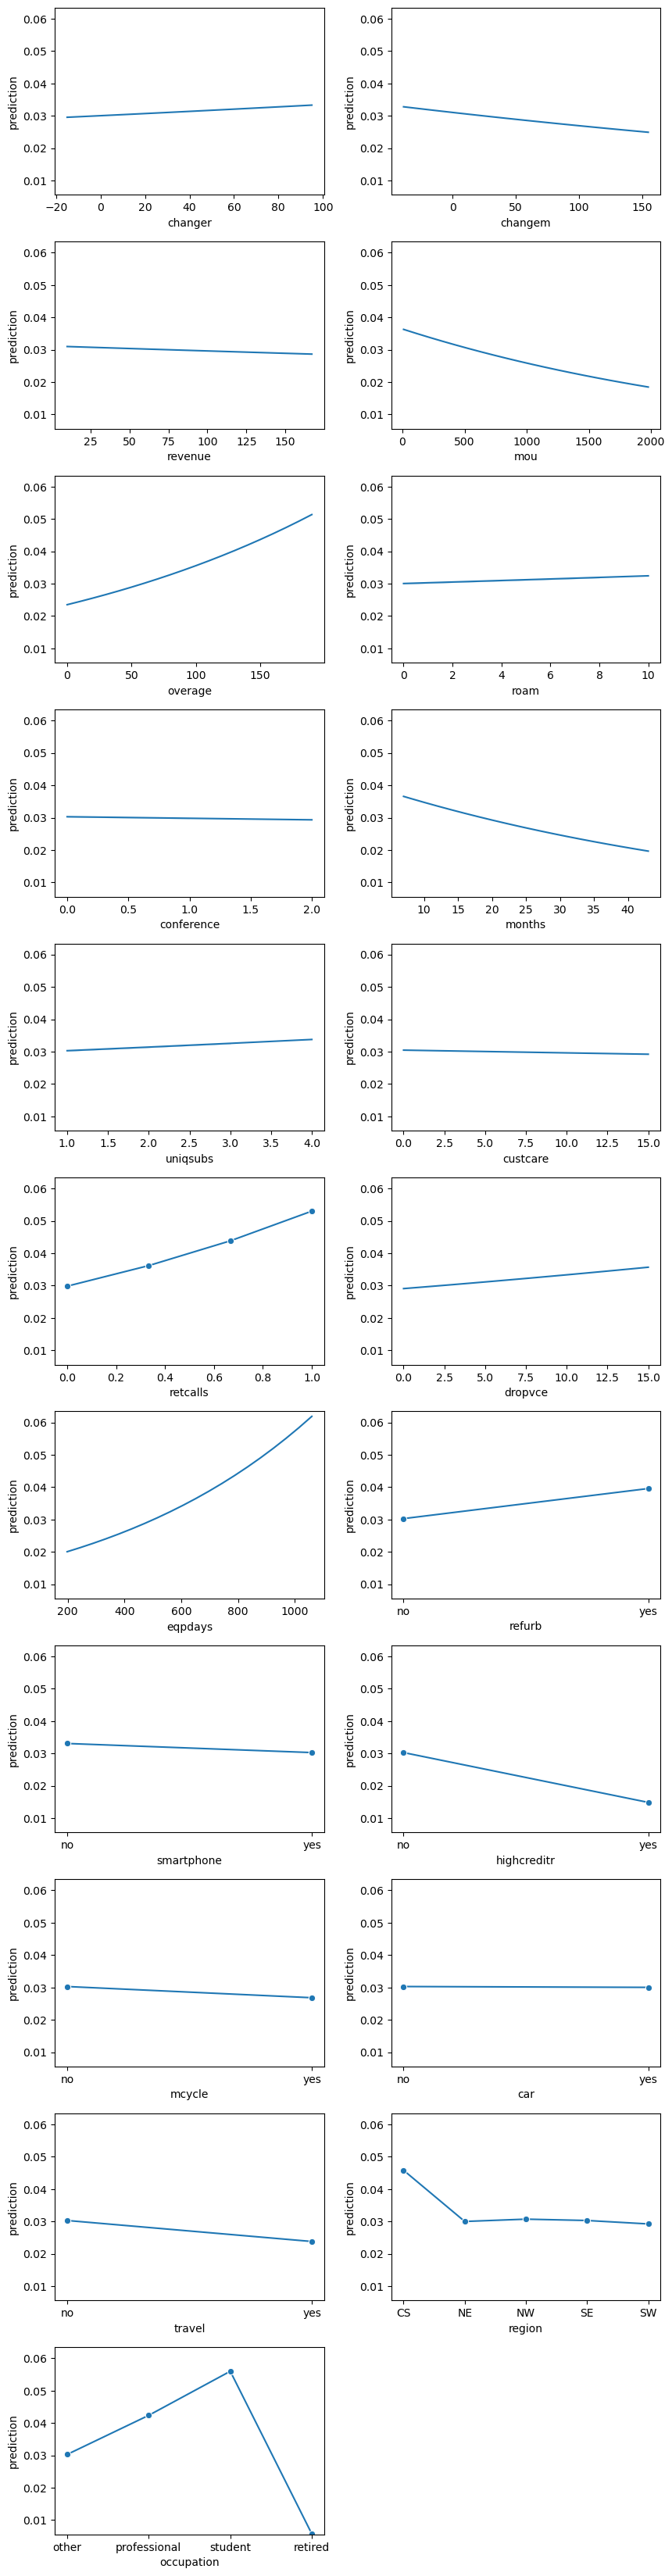

In [19]:
lrw.plot(
    "pred",
    data=s_mobile[s_mobile.representative == 1],
)

Briefly discuss 5 key drivers of churn from your analysis in this step using Variable
Importance (Permutation Importance) and Prediction or Partial Dependence plots

1. **Occupation**: The permutation importance plot indicates that occupation is a significant driver of churn. The partial dependence plot shows different churn probabilities for various occupations, with the "student" category particularly standing out. This suggests that students are more likely to churn, possibly due to their search for better deals or their transient nature.

2. **Equipment Days (eqpdays)**: This variable measures the number of days the customer has owned their current handset. The permutation importance plot shows a high importance, and the partial dependence plot indicates an increasing churn probability with the number of equipment days. This could be because customers with older handsets are more likely to switch to carriers that offer newer phones or better upgrade options.

3. **Overage**: The amount by which customers exceed their plan's usage limits also appears to be a crucial factor. The permutation importance is significant, and the partial dependence plot demonstrates an increasing likelihood of churn as overage increases, which may suggest customer dissatisfaction with plan limits or unexpected charges.

4. **Credit Rating (highcredit)**: The credit rating appears as an important predictor of churn, with higher churn probability associated with the "no" category in the high credit rating variable. Customers with a lower credit rating might have fewer options for switching due to credit requirements from other carriers or might be more sensitive to price and service quality.

5. **Number of Months with Service (months)**: The permutation importance for the number of months a customer has been with S-Mobile is notable, and the partial dependence plot shows a decreasing churn probability the longer a customer stays with the company. This suggests a loyalty effect, where customers with a longer tenure are less likely to leave, possibly due to established patterns of behavior or satisfaction with the service.

These drivers provide insights into the characteristics of customers most likely to churn. S-Mobile can use these insights to tailor targeted interventions, such as loyalty programs for long-term customers, specialized offers for students, and handset upgrade promotions to reduce churn rates.

### 3.    Use insights on churn drivers to develop actions/offers/incentives
- Consider each variable type, e.g., “Equipment characteristic”, “Customer usage”, etc. (see the data table at the end of this case)

Pick 3 but talk about why you are picking those 3 and not others from the top five.

Selecting three key drivers of churn from the top five involves considering not only their statistical importance but also their potential for actionable business strategies and the feasibility of addressing them through interventions. 

1. **Occupation**: I choose to focus on occupation because it's a strong indicator of churn that can be directly influenced by targeted marketing campaigns. For example, the high churn rate among students suggests that offering student-specific plans or promotions could be an effective retention strategy. On the other hand, targeting based on occupation can be more manageable and cost-effective compared to more invasive or less ethical alternatives, like changing credit rating requirements.

2. **Equipment Days (eqpdays)**: The positive relationship between the number of equipment days and churn suggests that customers may be seeking newer technology or better functioning devices. Focusing on this driver allows S-Mobile to create programs for earlier handset upgrades or incentives for trading in old handsets for newer models. This is a strategic choice because it addresses a tangible and controllable aspect of the customer experience that can directly influence customer satisfaction and loyalty.

3. **Overage**: Addressing overage is a choice because it is indicative of customer dissatisfaction with their current plans. By redesigning plans to reduce overage occurrences or offering more flexible options, S-Mobile can address a clear pain point. This driver is actionable because it can potentially be rectified by adjusting existing service plans or by providing clearer communication regarding usage policies.

The drivers **Credit Rating (highcredit)** and **Number of Months with Service (months)** were not selected for the following reasons:

- **Credit Rating (highcredit)**: While important, the credit rating is less actionable as a churn driver since it is less ethical and more challenging to change or influence a customer's credit rating. Additionally, interventions based on credit rating could be viewed as discriminatory and could harm the company's reputation.
  
- **Number of Months with Service (months)**: The churn probability decreases as the number of months increases, indicating a natural customer loyalty that develops over time. While this is a valuable insight, it is not as immediately actionable as other variables. The loyalty is likely a result of cumulative positive experiences, which are harder to influence in the short term compared to specific targeted interventions that could be developed for occupation or handset upgrades.

By choosing drivers that are both significant and actionable, S-Mobile can implement focused retention strategies that are likely to have the most immediate and positive impact on reducing customer churn.

### 4.    Quantify the impact of these actions/offers/incentives on the probability of churn
- Either (i) predict the effect of a churn driver (similar to what we did for Pentathlon NPTB) or  (ii) suggest how you might set up an experiment (RCT) to evaluate the action/incentive/offer in the field
- Generate predictions for the representative sample
- Since it is not feasible to execute an RCT, describe how you would set up such an experiment and then make an assumption about the impact on churn that you can use in steps 5 and 6


#### occupation

In [20]:
s_mobile['churn_yes'] = (s_mobile['churn'] == 'yes').astype(int)
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep["p_student"] = lrw.predict(s_mobile_rep.assign(occupation = 'student'))["prediction"]
s_mobile_rep.loc[s_mobile_rep.occupation != 'student', ["churn_yes", "p_student"]].agg(
    ["count", "mean"]
).round(4)


,churn_yes,p_student
count,28346.0000,28346.0000
mean,0.0187,0.0603


#### eqpdays

In [21]:
s_mobile_churn = s_mobile[s_mobile['churn_yes'] == 0]
mean_eqp= s_mobile_churn['eqpdays'].mean()
mean_eqp


508.4802862985685

In [22]:
s_mobile['churn_yes'] = (s_mobile['churn'] == 'yes').astype(int)
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep["p_eqp"] = lrw.predict(s_mobile_rep.assign(eqpdays = mean_eqp))["prediction"]
s_mobile_rep.loc[s_mobile_rep.eqpdays < mean_eqp, ["churn_yes", "p_eqp"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_eqp
count,17646.0000,17646.0000
mean,0.0163,0.0333


#### overage

In [23]:
s_mobile_churn = s_mobile[s_mobile['churn_yes'] == 0]
mean_ovr= s_mobile_churn['overage'].mean()
mean_ovr

61.34531697341513

In [24]:
s_mobile['churn_yes'] = (s_mobile['churn'] == 'yes').astype(int)
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep["p_ovr"] = lrw.predict(s_mobile_rep.assign(overage = mean_ovr))["prediction"]
s_mobile_rep.loc[s_mobile_rep.overage < mean_ovr, ["churn_yes", "p_ovr"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_ovr
count,16411.0000,16411.0000
mean,0.0189,0.0358


#### CreditRating

In [25]:
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep['highcreditr']


2         no
4         no
5         no
7        yes
10       yes
        ... 
68985     no
68988     no
68991     no
68995     no
68999     no
Name: highcreditr, Length: 30000, dtype: category
Categories (2, object): ['no', 'yes']

In [26]:
s_mobile['churn_yes'] = (s_mobile['churn'] == 'yes').astype(int)
s_mobile_rep = s_mobile.query("representative == 1").copy()
s_mobile_rep["p_credit"] = lrw.predict(s_mobile_rep.assign(highcreditr = 'yes'))["prediction"]
s_mobile_rep.loc[s_mobile_rep.highcreditr == 'no', ["churn_yes", "p_credit"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_credit
count,24487.0000,24487.0000
mean,0.0223,0.0181


### 5.    Decide which actions/offers/incentives to target to which customers
- For each action/offer/incentive specify the criteria used to select customers. Will you apply the action/offer/incentive to all customers, or a subset? Motivate your approach


### ANS:

- For eqpdays and overage, the longer the amount of days the customers have had the account or the more overage minutes they have will both increase the likelihood to churn. The approach we used it to calculate the mean of the variable for the non-churn group. For both variables, we then predicted the churn rate if all customers had the mean value of the variable. Then, we selected the customers who had a value less than the mean and see if, by assgining the mean value to them, will increase the churn rate. 

- And for both groups, the churn rate increased, which means that the longer the amount of days the customers have had the account or the more overage minutes they have will both increase the likelihood to churn.

- So, to decrease the churn rate, we should target less customers who have had the account for a long time or have a lot of overage minutes.

- For occupation and credit rating, we know from the graph that the churn rate is the highest for students or customers who do not have a high credit rating. 

- For occupation, we predicted the churn rate if all customers were students. And for the customers who were not students, we wanted to see how their probability to churn changes if they were students. And the churn rate increased, which means that students are more likely to churn.

- For credit rating, we predicted the churn rate if all customers had a high credit rating. And for the customers who did not have a high credit rating, we wanted to see how their probability to churn changes if they had a high credit rating. And the churn rate decreased, which means that customers with a high credit rating are less likely to churn.

- So to decrease the churn rate, we should target less students or customers with a high credit rating.

### 6.    Evaluate the economics (CLV):
- For two actions/offers/incentives provide a comprehensive evaluation of the profitability implications using a 5-year (60 month) time window

In [27]:
s_mobile

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,highcreditr,mcycle,car,travel,region,occupation,training,representative,churn_yes,cweight
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,no,no,no,CS,other,0.0,0,1,1
1,U56788559,no,0,3,54,146,0,0,0,8,...,yes,no,no,no,SE,other,0.0,0,0,29
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,NW,professional,NaN,1,0,29
3,U75794640,no,0,-8,35,560,0,0,0,37,...,yes,yes,no,no,NW,retired,1.0,0,0,29
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,yes,no,SW,other,NaN,1,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,U97081813,no,0,-15,33,49,0,0,0,19,...,no,yes,yes,no,SW,other,NaN,1,0,29
68996,U24071089,no,0,95,30,78,0,0,0,18,...,no,yes,yes,no,SE,other,1.0,0,0,29
68997,U52895026,yes,0,5,43,250,53,0,0,25,...,no,no,no,no,CS,student,0.0,0,1,1
68998,U69840472,yes,-3,-29,41,288,0,0,0,19,...,no,no,no,no,CS,other,1.0,0,1,1


In [28]:
avg_rev = s_mobile['revenue'].mean()
avg_rev




56.95920289855072

In [29]:
avg_change_4 = s_mobile.changer.tolist()
avg_change_list = [x / 100 for x in avg_change_4]
avg_change_list


[1.09,
 0.0,
 0.0,
 0.0,
 -0.02,
 -0.02,
 0.09,
 0.96,
 0.11,
 0.0,
 0.01,
 -0.15,
 0.01,
 -0.02,
 0.0,
 -0.05,
 0.0,
 0.0,
 0.07,
 0.33,
 -0.01,
 0.0,
 0.27,
 0.0,
 -0.04,
 -0.05,
 -0.01,
 0.0,
 -0.03,
 -0.09,
 -0.01,
 0.0,
 0.03,
 0.19,
 0.0,
 -0.29,
 -0.15,
 0.39,
 -0.05,
 0.0,
 -0.01,
 -0.06,
 0.0,
 -0.03,
 -0.08,
 -0.08,
 0.02,
 -0.01,
 -0.07,
 -0.01,
 0.02,
 -0.03,
 -0.07,
 -0.02,
 0.01,
 0.12,
 0.07,
 0.05,
 -0.1,
 -0.06,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.01,
 0.0,
 0.03,
 -0.04,
 -0.01,
 -0.07,
 -0.02,
 -0.02,
 0.5,
 -0.01,
 0.02,
 0.0,
 -0.02,
 1.23,
 -0.01,
 -0.02,
 0.46,
 0.0,
 0.0,
 -0.02,
 0.0,
 0.0,
 0.05,
 0.0,
 0.18,
 0.05,
 0.23,
 1.06,
 0.62,
 0.53,
 0.03,
 0.4,
 1.58,
 -0.02,
 -0.02,
 -0.06,
 0.0,
 -0.01,
 0.2,
 0.33,
 -0.05,
 0.4,
 0.23,
 -0.15,
 -0.23,
 0.0,
 0.0,
 -0.01,
 -0.02,
 0.01,
 0.7,
 0.0,
 -0.08,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03,
 0.34,
 -0.01,
 0.15,
 0.12,
 0.0,
 -0.01,
 0.49,
 0.0,
 -0.1,
 -0.08,
 0.0,
 -0.01,
 0.09,
 -0.05,
 -0.02,
 -0.01,
 0.65,
 -0.03,

Credit Rating

In [30]:
s_mobile = pd.read_parquet("data/s_mobile.parquet")
s_monile_credit = s_mobile.copy()
s_monile_credit["p_credit"] = lrw.predict(s_monile_credit.assign(highcreditr = 'yes'))["prediction"]
churn_credit = s_monile_credit["p_credit"].mean()



In [31]:
import pandas as pd
import random

cost = 5
initial_profit = avg_rev - cost
churn_rate = churn_credit
discount_rate = 0.8/100

column_names = [f"month{i}" for i in range(61)]

df_credit = pd.DataFrame(columns=column_names)

for i in range(61):
    avg_change = random.choice(avg_change_list)
    df_credit.loc[0, column_names[i]] = initial_profit * (1 + avg_change)


for i in range(61):
    churn_value = (1 - churn_rate) ** i
    df_credit.loc[1, column_names[i]] = churn_value

for i in range(1, 61):
    df_credit.loc[2, column_names[i]] = (df_credit.loc[1, column_names[i]] + df_credit.loc[1, column_names[i-1]]) / 2

for i in range(61):
    df_credit.loc[3, column_names[i]] = df_credit.loc[0, column_names[i]] * df_credit.loc[2, column_names[i]]

for i in range(61):
    df_credit.loc[4, column_names[i]] = df_credit.loc[3, column_names[i]] * (1 - discount_rate)

print(df_credit)


      month0     month1     month2     month3     month4     month5  \
0  53.517979  52.478795  51.439611  51.959203  51.439611  49.361243   
1        1.0   0.979941   0.960285   0.941023   0.922147    0.90365   
2        NaN   0.989971   0.970113   0.950654   0.931585   0.912899   
3        NaN  51.952466   49.90224  49.395216  47.920367  45.061806   
4        NaN  51.536846  49.503022  49.000055  47.537004  44.701312   

      month6     month7     month8     month9  ...    month51    month52  \
0  51.959203  52.478795  51.959203   69.10574  ...  54.037571  51.959203   
1   0.885524   0.867761   0.850355   0.833298  ...   0.355797    0.34866   
2   0.894587   0.876643   0.859058   0.841827  ...   0.359439   0.352229   
3  46.482025  46.005152  44.635987  58.175059  ...  19.423193  18.301527   
4  46.110169   45.63711  44.278899  57.709659  ...  19.267807  18.155115   

     month53    month54    month55    month56    month57    month58  \
0  74.821252  77.938804  51.959203  51.959203

In [32]:
clv_credit = df_credit.loc[4].sum()
clv_credit

1972.9191110851027

eqpdays

In [33]:
s_mobile = pd.read_parquet("data/s_mobile.parquet")
s_monile_eqp = s_mobile.copy()
s_monile_eqp["p_eqp"] = lrw.predict(s_monile_eqp.assign(eqpdays = mean_eqp))["prediction"]
churn_eqp = s_monile_eqp["p_eqp"].mean()
churn_eqp

0.035436962782651606

In [34]:
import pandas as pd
import random

cost = 5
initial_profit = avg_rev - cost
churn_rate = churn_eqp
discount_rate = 0.8/100

column_names = [f"month{i}" for i in range(61)]

df_eqp = pd.DataFrame(columns=column_names)

for i in range(61):
    avg_change = random.choice(avg_change_list)
    df_eqp.loc[0, column_names[i]] = initial_profit * (1 + avg_change)


for i in range(61):
    churn_value = (1 - churn_rate) ** i
    df_eqp.loc[1, column_names[i]] = churn_value

for i in range(1, 61):
    df_eqp.loc[2, column_names[i]] = (df_eqp.loc[1, column_names[i]] + df_eqp.loc[1, column_names[i-1]]) / 2

for i in range(61):
    df_eqp.loc[3, column_names[i]] = df_eqp.loc[0, column_names[i]] * df_eqp.loc[2, column_names[i]]

for i in range(61):
    df_eqp.loc[4, column_names[i]] = df_eqp.loc[3, column_names[i]] * (1 - discount_rate)

print(df_eqp)


      month0     month1     month2     month3     month4     month5  \
0  51.959203  51.959203  47.802467  56.635531  65.988188  51.959203   
1        1.0   0.964563   0.930382   0.897412    0.86561   0.834936   
2        NaN   0.982282   0.947472   0.913897   0.881511   0.850273   
3        NaN  51.038565   45.29152  51.759036  58.169324  44.179512   
4        NaN  50.630256  44.929188  51.344964   57.70397  43.826076   

      month6     month7     month8     month9  ...    month51    month52  \
0  51.959203  50.920019  48.841651  51.959203  ...  52.478795  57.155123   
1   0.805348   0.776809   0.749281   0.722729  ...   0.158804   0.153176   
2   0.820142   0.791079   0.763045   0.736005  ...   0.161721    0.15599   
3  42.613924   40.28174  37.268389  38.242245  ...    8.48693    8.91564   
4  42.273013  39.959486  36.970241  37.936307  ...   8.419034   8.844315   

     month53    month54    month55    month56    month57    month58  \
0  54.557163  51.959203  52.998387  53.517979

In [35]:
clv_eqp = df_eqp.loc[4].sum()
clv_eqp

1369.9694433037755

# S-Mobile Working Steps

### 1. Model Development to Predict Customer Churn

Our team began by developing a predictive model for customer churn at S-Mobile. Recognizing the diverse techniques available, we decided to build multiple models, including logistic regression as mandated. We utilized the training dataset, focusing on a range of variables that describe customer characteristics and behavior.

In our logistic regression model, key variables such as customer usage trends, equipment characteristics, and personal attributes were included. We were particularly attentive to model interpretability, ensuring our choices aligned with the business context of S-Mobile. Additional models employed included a Random Forest model for its robustness against overfitting and a Neural Network model for its ability to capture complex non-linear relationships.

Each model underwent rigorous evaluation based on various performance metrics like Accuracy, ROC-AUC score, and Precision-Recall trade-offs. The logistic regression model, while simpler, provided a good balance between performance and interpretability, making it crucial for subsequent analysis of churn drivers.



### 2. Identifying Key Churn Drivers

Utilizing Variable Importance (Permutation Importance) and Partial Dependence plots, we identified five critical drivers of churn: occupation, equipment days (eqpdays), overage charges, credit rating, and the length of service with S-Mobile. Each of these factors displayed distinct patterns influencing churn probability. 

For instance, the occupation, particularly students, showed higher churn rates, likely due to price sensitivity and lifestyle changes. Similarly, eqpdays had a positive correlation with churn, indicating that older handsets increased churn risk. Overages, a clear indicator of customer dissatisfaction with their current plans, also emerged as a significant churn driver. 



### 3. Developing Targeted Actions/Offers/Incentives

Based on these insights, we conceptualized specific actions, offers, and incentives. We considered variables like equipment characteristics to propose upgrade incentives or trade-in programs for older handsets. For overage-related churn, we suggested plan restructuring or more transparent communication about usage limits. Targeted offers for students and different service tenure segments were also devised to address specific churn propensities identified in these groups.



### 4. Quantifying the Impact

To estimate the impact of these strategies, we simulated scenarios where these actions were implemented. Using the representative sample, we predicted changes in churn rates under different conditions – such as improved handset offers or revised overage charges. While we couldn't conduct a real-world Randomized Controlled Trial (RCT), our assumptions and simulations provided a basis for understanding potential impacts.



### 5. Targeting Strategies to Specific Customer Segments

Our targeting approach was nuanced, aiming not to blanket all customers but to focus on segments most likely to respond positively. For instance, handset upgrade incentives were primarily directed at customers with older models, while revised overage plans targeted those frequently exceeding their limits. Students were identified for specialized plans considering their higher churn likelihood.



### 6. Economic Evaluation

Finally, we conducted a comprehensive evaluation of the profitability implications of our proposed actions over a 5-year horizon. This involved calculating the Customer Lifetime Value (CLV) under different scenarios, considering both the costs of our initiatives and the expected reduction in churn. Our analysis showed that while some strategies required upfront investment, they were justified by the increased CLV and reduced churn over time.

---



***As is mentioned above, our approach at S-Mobile was data-driven and customer-centric. We not only developed a robust predictive model but also delved deeply into understanding the specific churn drivers. Our targeted strategies were designed to address these drivers effectively while keeping an eye on the economic implications to ensure long-term viability and profitability for S-Mobile.***

## Additional Section: Exploration of Other Models - Random Forest and Neural Network

In our pursuit of a better churn prediction model, we expanded our analysis beyond logistic regression to include other sophisticated modeling techniques: Random Forest and Neural Network models. This comprehensive approach was pivotal in ensuring we captured a broad spectrum of patterns and relationships within the customer data.

### Random Forest Model
Random Forest, known for its efficacy in handling large datasets and reducing overfitting, was a natural choice given its ensemble learning approach. The model was built with a keen focus on optimizing the number of trees and depth to strike a balance between bias and variance. Our Random Forest model was evaluated on the same metrics as our logistic regression model, with particular attention to its performance in terms of accuracy and AUC.

One of the standout advantages of the Random Forest model was its ability to handle non-linear relationships and interactions between variables, which are often present in complex datasets like customer churn. Additionally, the model provided insights into feature importance, contributing to our understanding of churn drivers. However, a trade-off for this model was its interpretability, which was less straightforward compared to logistic regression.

### Neural Network Model
To capture the more intricate and non-linear patterns in the data, we also experimented with a Neural Network model. This model's architecture was carefully crafted, with layers and neurons tuned to optimize performance. We paid close attention to aspects like the activation function, the number of hidden layers, and the dropout rate to prevent overfitting.

The Neural Network model demonstrated significant prowess in pattern recognition, capturing subtle nuances in the data. However, its complexity introduced challenges in interpretability. Unlike logistic regression, where model coefficients provide direct insight into feature influence, the Neural Network's distributed feature importance across neurons and layers made it more challenging to derive clear, actionable insights.

### Model Comparison and Selection
In comparing these models, we considered factors beyond mere predictive accuracy. While the Random Forest and Neural Network models showed potential in capturing complex relationships and achieving high accuracy, we ultimately prioritized interpretability for this business application. The logistic regression model, with its inherent interpretability and ability to produce well-calibrated probability estimates, was deemed more suitable for providing clear, actionable insights crucial for strategic decision-making in churn prevention.

The integration of these analyses into our overall strategy reinforced the rigor and comprehensiveness of our approach. By examining various modeling techniques, we ensured that our final recommendations were grounded in a thorough understanding of the customer data and its underlying patterns.

This addition brings our report to a comprehensive conclusion, encompassing the depth and breadth of our analytical journey in tackling the challenge of customer churn at S-Mobile. From meticulous model development and detailed analysis of churn drivers to strategic planning of targeted actions and their economic evaluation, our approach has been both data-driven and customer-centric, ensuring alignment with S-Mobile’s strategic goals while prioritizing customer satisfaction and retention. ​

# Random Forest 

In [36]:
s_mobile_rf = pd.read_parquet("data/s_mobile.parquet")

In [37]:
s_mobile_rf["churn_yes"] = rsm.ifelse(s_mobile_rf["churn"] == "yes", 1, 0)

In [38]:
df_train_rf = s_mobile_rf[s_mobile_rf['training'] == 1]
df_test_rf = s_mobile_rf[s_mobile_rf['training'] == 0]

In [39]:
X_train = df_train_rf[evar]
y_train = df_train_rf['churn']

In [40]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  
)

rf = RandomForestClassifier(random_state=21)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  
)

param_grid_rf = {
    'rf__n_estimators': [10,25,30,35],
    'rf__max_features': ['sqrt', 'log2', 0.5, None, 0.75],
    'rf__min_samples_leaf': [100],
}

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', rf)
])

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, scoring='roc_auc', cv=5, refit=True, verbose=5, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best score for Random Forest:", grid_search_rf.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for Random Forest: {'rf__max_features': 0.5, 'rf__min_samples_leaf': 100, 'rf__n_estimators': 35}
Best score for Random Forest: 0.7255435199720914


In [41]:
rff = grid_search_rf.best_estimator_
x = s_mobile_rf[evar]
y = s_mobile_rf['churn']

s_mobile_rf['pred_rf'] = rff.predict_proba(x)[:, 1]

/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


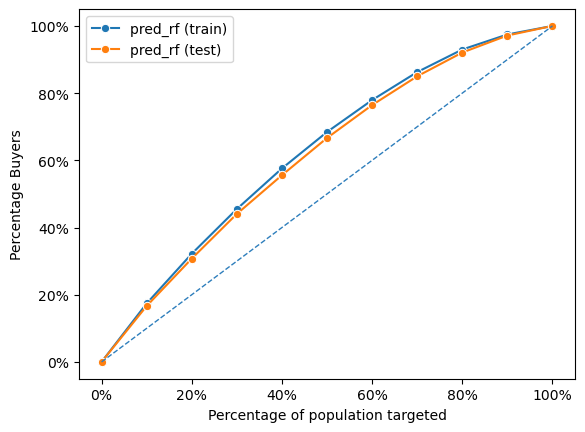

In [42]:
dct = {"train": s_mobile_rf[s_mobile_rf.training == 1], "test": s_mobile_rf[s_mobile_rf.training == 0]}
fig = rsm.gains_plot(dct, "churn", "yes", "pred_rf")

In [43]:
rf = rsm.model.rforest(
    data={"data": df_train_rf},
    rvar="churn",
    lev="yes",
    evar=evar, 
    max_features=0.5,
    min_samples_leaf=100,
    n_estimators=35,
    mod_type="classification",
    random_state=21,
)
rf.summary()

Random Forest
Data                 : data
Response variable    : churn
Level                : yes
Explanatory variables: changer, changem, revenue, mou, overage, roam, conference, months, uniqsubs, custcare, retcalls, dropvce, eqpdays, refurb, smartphone, highcreditr, mcycle, car, travel, region, occupation
OOB                  : True
Model type           : classification
Nr. of features      : (21, 28)
Nr. of observations  : 27,300
max_features         : 0.5 (0)
n_estimators         : 35
min_samples_leaf     : 100
random_state         : 21
AUC                  : 0.724

Estimation data      :
 changer  changem  revenue  mou  overage  roam  conference  months  uniqsubs  custcare  retcalls  dropvce  eqpdays  refurb_yes  smartphone_yes  highcreditr_yes  mcycle_yes  car_yes  travel_yes  region_CS  region_NE  region_NW  region_SE  region_SW  occupation_other  occupation_professional  occupation_student  occupation_retired
       0       -8       35  560        0     0           0      37   

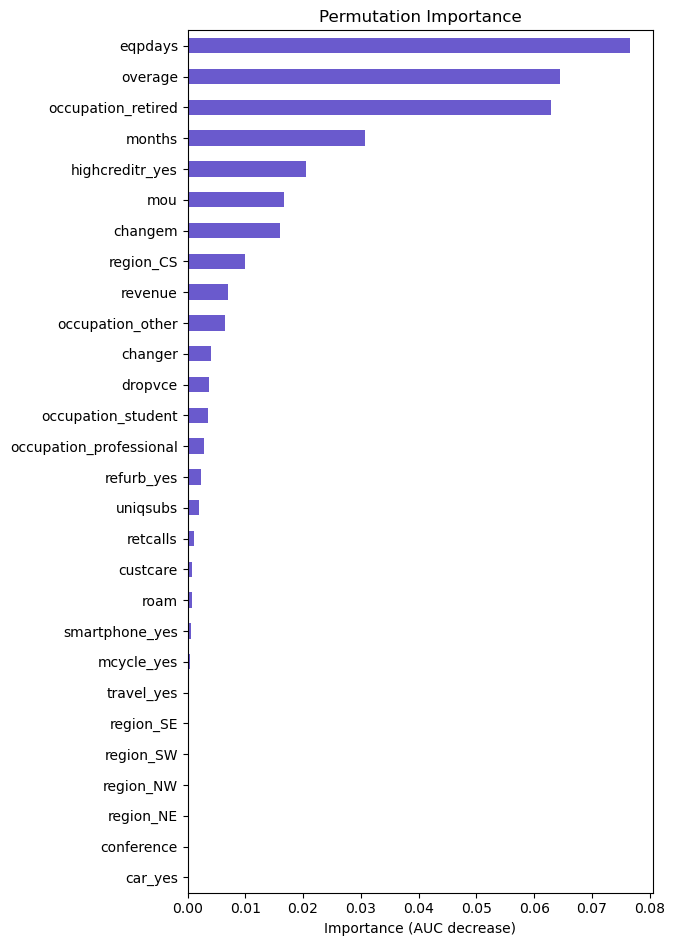

In [44]:
rf.plot("vimp")

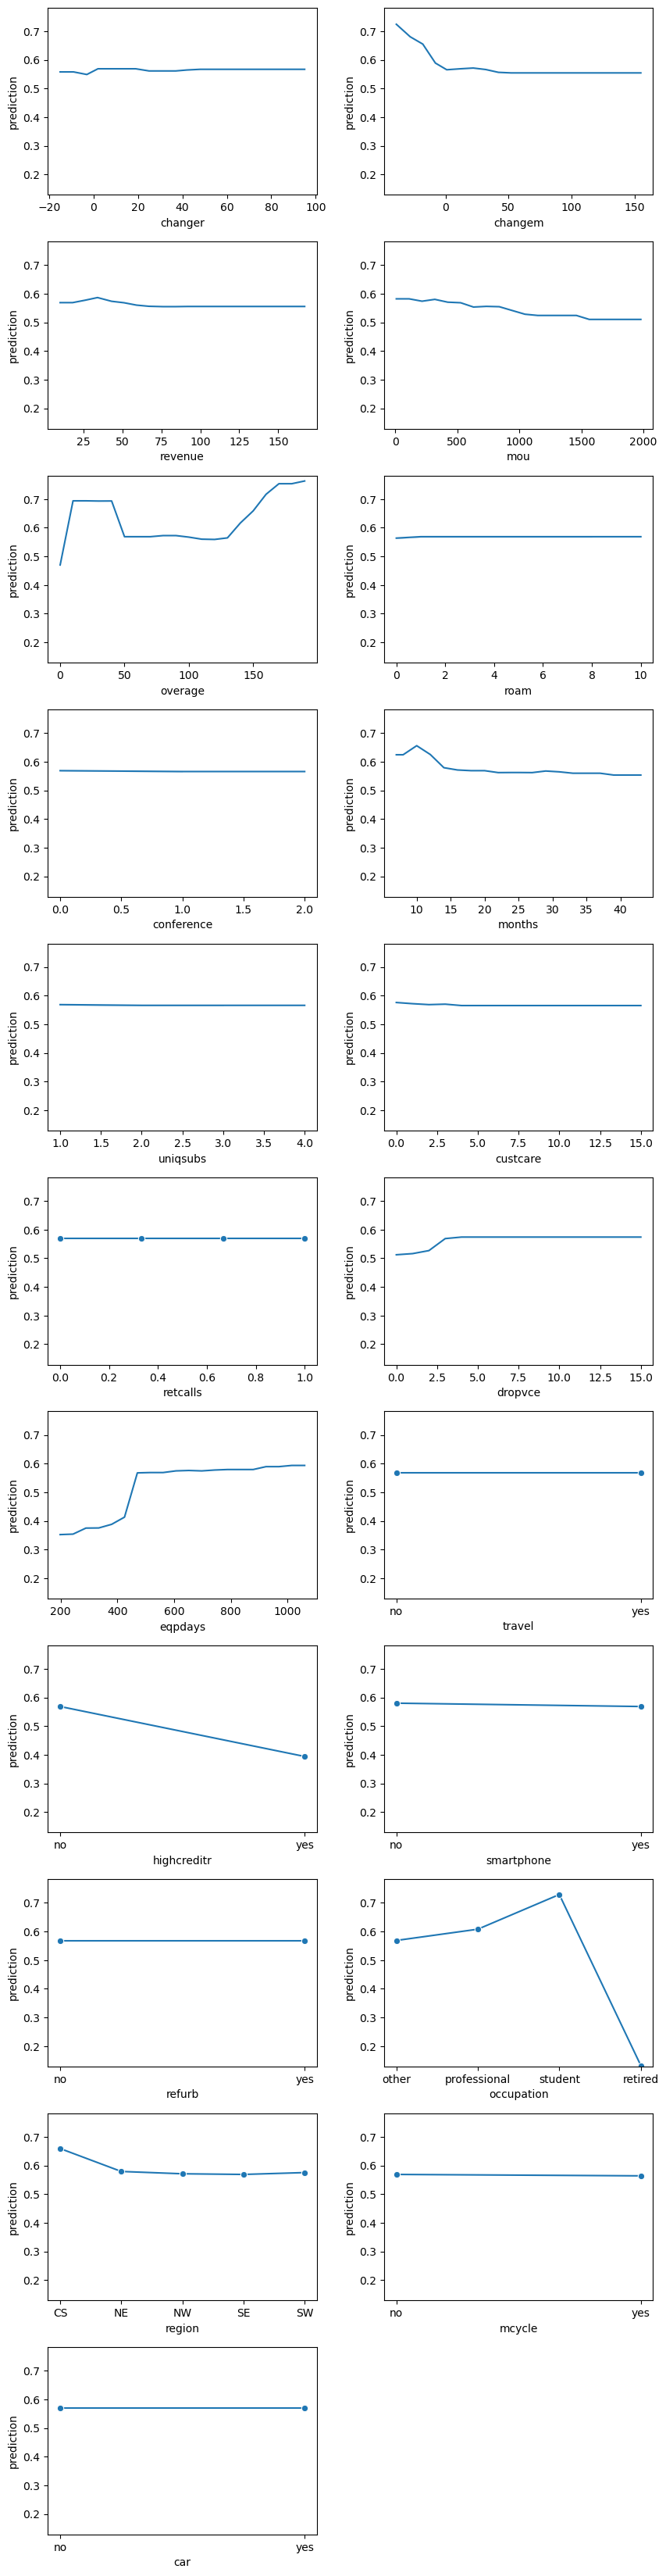

In [45]:
rf.plot(
    plots = "pred",
    data = s_mobile[s_mobile.representative == 1],
)

>- eqpdays

In [46]:
s_mobile_rf['churn_yes'] = (s_mobile_rf['churn'] == 'yes').astype(int)
s_mobile_rep_rf = s_mobile_rf.query("representative == 1").copy()
s_mobile_rep_rf["p_eqp"] = rf.predict(s_mobile_rep_rf.assign(eqpdays = mean_eqp))["prediction"]
s_mobile_rep_rf.loc[s_mobile_rep_rf.eqpdays < mean_eqp, ["churn_yes", "p_eqp"]].agg(
    ["count", "mean"]
).round(4)

,churn_yes,p_eqp
count,17646.0000,17646.0000
mean,0.0163,0.5301


>- Reasons of choosing logistics model over Random Forest Model:

- Based on the partial dependence plots of Random Forest model, some variables exhibit almost no change in the prediction across different values, which suggests that the model may not be capturing a strong relationship between those variables and the outcome, or that these variables do not have a strong linear relationship with the likelihood of churn.
- After we tried to quantify the effects of controlling the number of days customer has owned current handset, the probability of the churn rates became much larger and less comparable. 
- The weights in logistic regression can be used to assess the relative importance of each feature directly. This is contrasted with a random forest model, where feature importance is typically measured by how much each feature decreases the impurity of a split, which is less intuitive and might not always capture the true predictive power of a feature.
-  Logistic regression models, especially when properly regularized, tend to produce well-calibrated probabilities. Random forest probabilities can sometimes be less calibrated, and thus may require additional calibration methods post-modeling. 

### Neural Network

In [47]:
s_mobile_nn = pd.read_parquet("data/s_mobile.parquet")
s_mobile_nn

,customer,churn,changer,changem,revenue,mou,overage,roam,conference,months,...,refurb,smartphone,highcreditr,mcycle,car,travel,region,occupation,training,representative
0,U86940794,yes,109,81,62,600,141,0,0,8,...,no,yes,no,no,no,no,CS,other,0.0,0
1,U56788559,no,0,3,54,146,0,0,0,8,...,no,yes,yes,no,no,no,SE,other,0.0,0
2,U47928407,no,0,-9,39,1158,96,0,1,9,...,no,yes,no,yes,no,yes,NW,professional,NaN,1
3,U75794640,no,0,-8,35,560,0,0,0,37,...,no,yes,yes,yes,no,no,NW,retired,1.0,0
4,U41010771,no,-2,-8,100,1888,112,9,0,20,...,no,yes,no,yes,yes,no,SW,other,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68995,U97081813,no,0,-15,33,49,0,0,0,19,...,no,yes,no,yes,yes,no,SW,other,NaN,1
68996,U24071089,no,0,95,30,78,0,0,0,18,...,no,no,no,yes,yes,no,SE,other,1.0,0
68997,U52895026,yes,0,5,43,250,53,0,0,25,...,no,no,no,no,no,no,CS,student,0.0,0
68998,U69840472,yes,-3,-29,41,288,0,0,0,19,...,no,yes,no,no,no,no,CS,other,1.0,0


In [48]:
df_train_nn = s_mobile_nn[s_mobile_nn['training'] == 1]
df_test_nn = s_mobile_nn[s_mobile_nn['training'] == 0]

In [49]:
X_train = df_train_nn[evar]
y_train = df_train_nn['churn']

In [50]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  
)

mlp = MLPClassifier(random_state=21)

hidden_layer_sizes = []
for n_layers in range(1, 4):  
    for neurons in range(1, 6):  
        hidden_layer_sizes.append((neurons,)*n_layers)

param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'mlp__alpha': [0.0001, 0.001, 0.01],
    'mlp__solver': ['adam'],
    'mlp__activation': ['relu', 'tanh', 'logistic'],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__max_iter': [1000],
}


pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('mlp', mlp)
])

grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=5, refit=True, verbose=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best hyperparameters: {'mlp__activation': 'logistic', 'mlp__alpha': 0.001, 'mlp__hidden_layer_sizes': (100,), 'mlp__learning_rate_init': 0.001, 'mlp__max_iter': 1000, 'mlp__solver': 'adam'}
Best score: 0.7088569013404179


In [51]:
mlp = grid_search.best_estimator_
x = s_mobile_nn[evar]
y = s_mobile_nn['churn']

In [52]:
s_mobile_nn['pred_mlp'] = mlp.predict_proba(x)[:, 1]

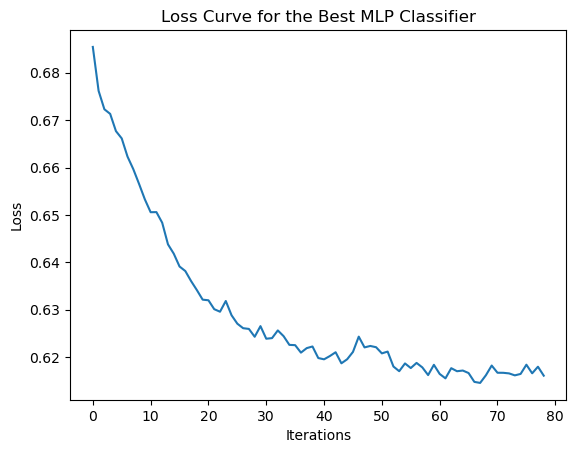

In [53]:
best_mlp_pipeline = grid_search.best_estimator_

# The MLPClassifier is named 'mlp' in your pipeline
best_mlp_classifier = best_mlp_pipeline.named_steps['mlp']

# Now you can access the loss_curve_ attribute
loss_curve = best_mlp_classifier.loss_curve_

# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(loss_curve)
plt.title('Loss Curve for the Best MLP Classifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()


/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


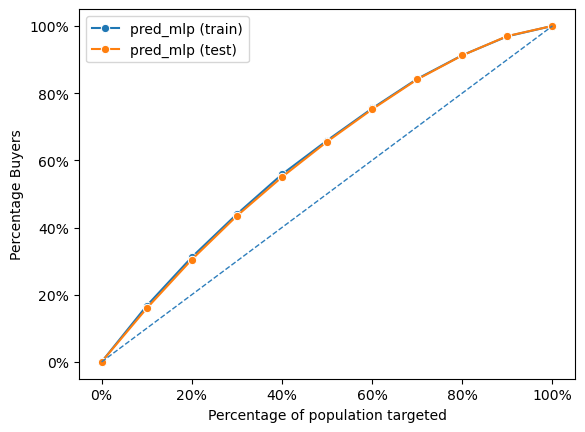

In [54]:
dct = {"train": s_mobile_nn[s_mobile_nn.training == 1], "test": s_mobile_nn[s_mobile_nn.training == 0]}
fig = rsm.gains_plot(dct, "churn", "yes", "pred_mlp")

In [55]:
mlp = rsm.model.mlp(
    data={"data": df_train_nn},
    rvar="churn",
    lev="yes",
    evar=evar,
    hidden_layer_sizes=(100,), 
    max_iter=1000,
    mod_type="classification",
    random_state=21,
    learning_rate_init = 0.001,
    solver='adam',
    activation='logistic', 
    tol=1e-4,  
    verbose=5
)
mlp.summary()

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.4473655   0.41994343 -0.5051861  ... -0.79428907  1.53780828
 -0.85210967]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.29911445  0.08076844 -0.29911445 ... -0.60992773 -0.29911445
 -0.40271888]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.24309003

Iteration 1, loss = 0.67371821
Iteration 2, loss = 0.65207895
Iteration 3, loss = 0.64201661
Iteration 4, loss = 0.63803825
Iteration 5, loss = 0.63653951
Iteration 6, loss = 0.63540594
Iteration 7, loss = 0.63475910
Iteration 8, loss = 0.63470467
Iteration 9, loss = 0.63473586
Iteration 10, loss = 0.63443239
Iteration 11, loss = 0.63428476
Iteration 12, loss = 0.63428201
Iteration 13, loss = 0.63417727
Iteration 14, loss = 0.63427810
Iteration 15, loss = 0.63410118
Iteration 16, loss = 0.63407339
Iteration 17, loss = 0.63416016
Iteration 18, loss = 0.63393139
Iteration 19, loss = 0.63401889
Iteration 20, loss = 0.63389275
Iteration 21, loss = 0.63367816
Iteration 22, loss = 0.63369717
Iteration 23, loss = 0.63391085
Iteration 24, loss = 0.63355776
Iteration 25, loss = 0.63351249
Iteration 26, loss = 0.63368668
Iteration 27, loss = 0.63341180
Iteration 28, loss = 0.63293493
Iteration 29, loss = 0.63292071
Iteration 30, loss = 0.63278389
Iteration 31, loss = 0.63250948
Iteration 32, los

/opt/conda/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


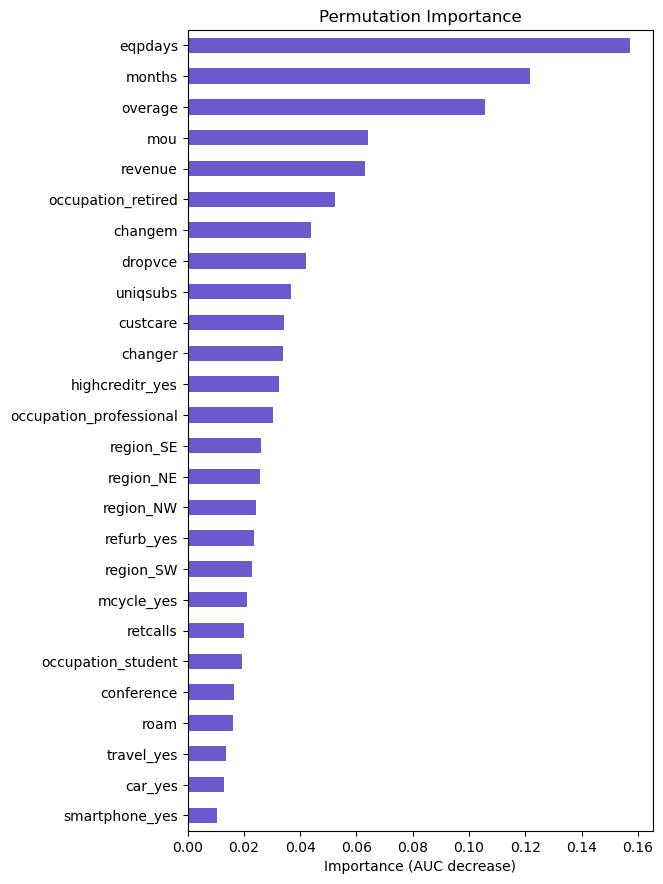

In [56]:
mlp.plot("vimp")

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/model/mlp.py:249: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  data.loc[:, rvar] = convert_binary(data.loc[:, rvar], self.lev)
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.46663903 -0.4473655  -0.42809197 ... -0.4473655  -0.58228022
  0.8246876 ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.29911445 -0.36818407 -0.36818407

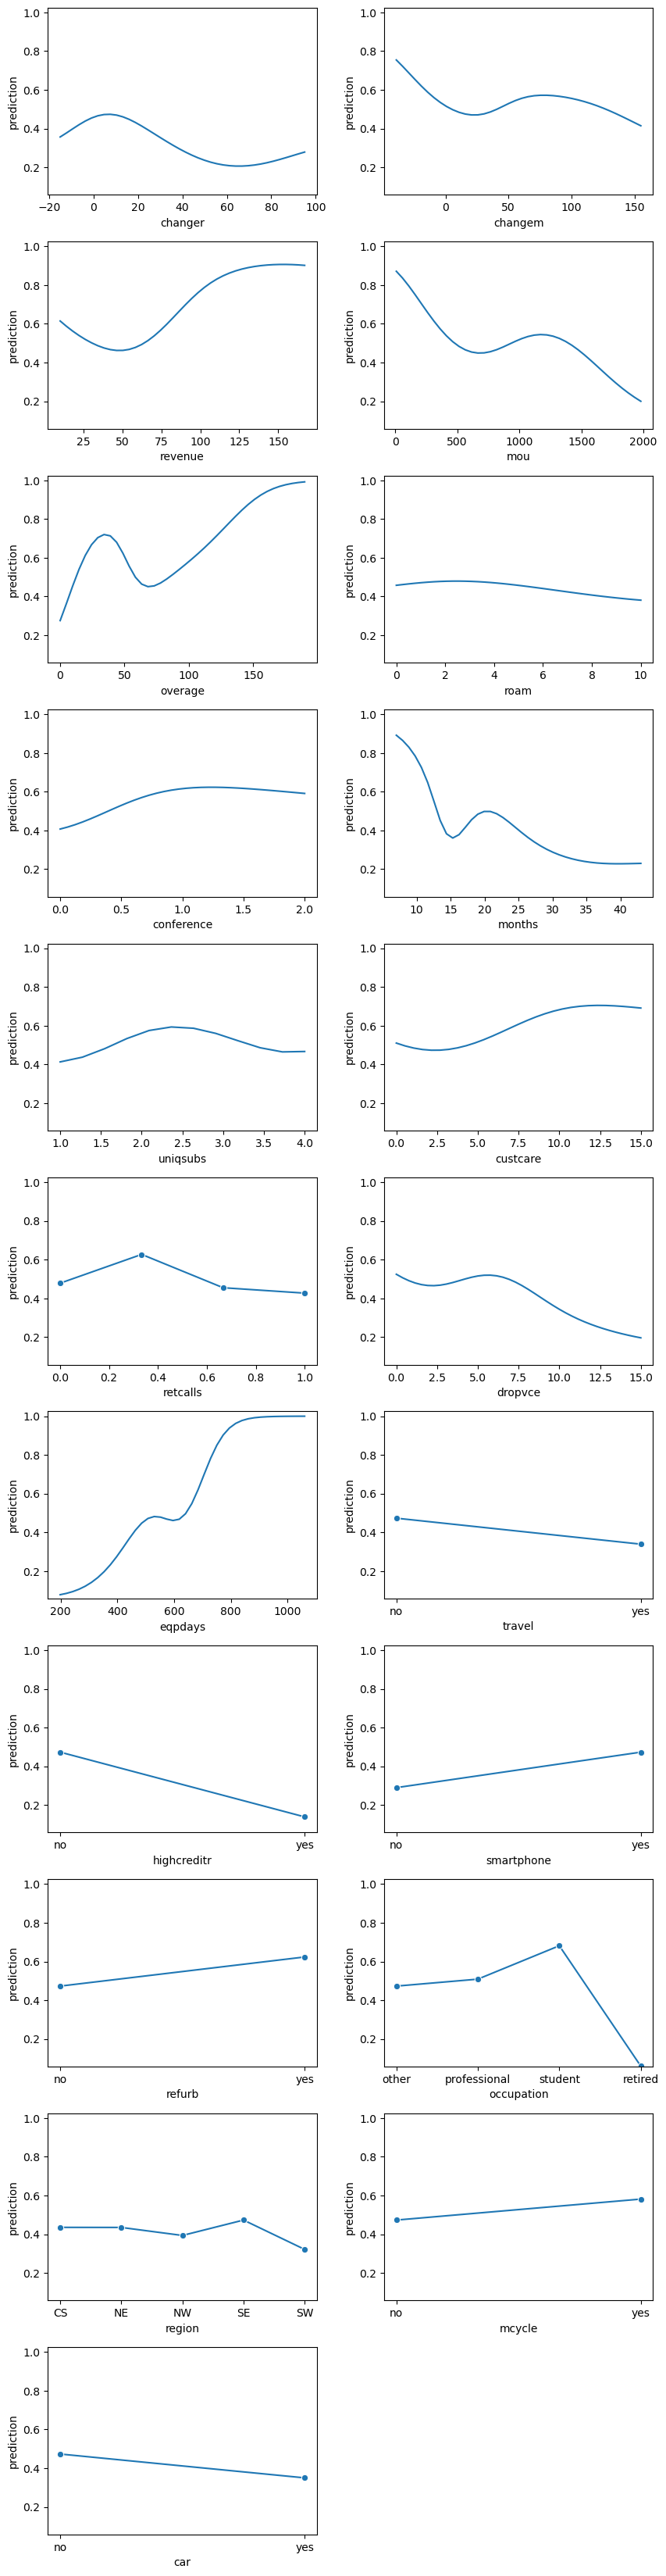

In [57]:
mlp.plot(
    plots = "pred",
    data = s_mobile_nn[s_mobile_nn.representative == 1],
)

In [58]:
s_mobile_nn['churn_yes'] = (s_mobile_nn['churn'] == 'yes').astype(int)
s_mobile_rep_nn = s_mobile_nn.query("representative == 1").copy()
s_mobile_rep_nn["p_eqp"] = mlp.predict(s_mobile_rep_nn.assign(eqpdays = mean_eqp))["prediction"]
s_mobile_rep_nn.loc[s_mobile_rep_nn.eqpdays < mean_eqp, ["churn_yes", "p_eqp"]].agg(
    ["count", "mean"]
).round(4)

/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.46663903 -0.4473655  -0.42809197 ... -0.4473655  -0.58228022
  0.8246876 ]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.29911445 -0.36818407 -0.36818407 ... -0.29911445 -0.29911445
 -0.26457964]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[:, isNum] = (dfs - means) / stds
/home/jovyan/.rsm-msba/lib/python3.11/site-packages/pyrsm/stats.py:228: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.67952331

,churn_yes,p_eqp
count,17646.0000,17646.0000
mean,0.0163,0.5304


>- Reasons of choosing Logistics Model over Neural Network Model: 
- Based on the pred plots and the further calculations, logistic regression is inherently interpretable and the model coefficients can be seen as weights that directly affect the outcome. This is not as straightforward with neural networks, where the importance of features is distributed across multiple neurons and layers, making it difficult to discern their individual impact.
- Logistic regression models are more likely to produce well-calibrated probability estimates. In neural networks, the probability estimates can be less intuitive, and often additional calibration techniques are required to align the output with actual probabilities.

### Generative AI (5 points): Describe in detail how your team used Generative AI-tools like ChatGPT to support your work on this case. Provide pdfs and/or screenshots of your "discussions" with these tools and comment on what things did and did not go well. 


- https://chat.openai.com/share/c4cd50f9-9c74-4efd-9877-34d6f3d90c17

>- What Worked Well:

- Generative AI helped clarify how logistic regression provides interpretable weights for each feature, aiding in the understanding of feature importance and how each variable contributes to the predicted outcome. This was valuable for explaining the model choice to stakeholders who prefer interpretable models.

- When faced with issues such as uniform predictions in the neural network model, Generative AI provided diagnostics steps to help identify potential causes, like checking for data preprocessing consistency, verifying model architecture complexity, and inspecting learning rates.

- Generative AI was instrumental in explaining the concept of Customer Lifetime Value (CLV) and the general logic behind its calculation, providing a foundational understanding that can be built upon for more complex, case-specific computations.

>- What Did Not Go Well:

- While Generative AI laid out the groundwork for understanding CLV, it struggled with providing advanced, assumption-heavy computations. The inherently complex and customized nature of CLV calculations meant that this was an area where Generative AI's guidance was more limited and required additional information.

- Transitioning between different Python packages such as sklearn and pyrsm brought about challenges due to the lack of Generative AI's knowledge on the latter. This led to a need for manual exploration to understand different formats and parameters accepted by each package, as well as how to effectively translate code from one package to another.

>- Additional Considerations:

- Generative AI provided valuable assistance in interpreting partial dependence plots, helping to make sense of how features in the random forest model influenced predictions. However, visualizing these relationships for stakeholders required careful manual review to ensure the plots were accurate and representative of the model's understanding.

- When tuning models, especially neural networks, there's a high degree of customization involved. Generative AI was able to suggest a range of hyperparameters and potential adjustments, but the process of fine-tuning these settings for the specific context of the S-Mobile case required iterative trial-and-error that went beyond the AI's immediate recommendations.

- Decisions in data science are often constrained by business realities such as computational resources, time, and interpretability requirements. Generative AI helped align model choices with these constraints, but the nuances of each business case meant that some decisions had to be made based on judgment calls that considered factors beyond the AI's scope.